In [2]:
d = rastersstats_to_dict('./example_data/')

In [3]:
pairs = create_pairs(d)

15  pairs created


In [90]:
pairs

{'2013 v. 2015': {'2013': {'arr': array([[0.6246631 , 0.50161624, 0.40215942, ..., 0.4590442 , 0.47079346,
           0.45980713],
          [0.65545535, 0.57107425, 0.4734485 , ..., 0.44357178, 0.41979858,
           0.38333008],
          [0.7100513 , 0.610564  , 0.5008533 , ..., 0.47131225, 0.46536133,
           0.44332764],
          ...,
          [0.71133304, 0.75704837, 0.7279346 , ..., 0.57888675, 0.61117435,
           0.5903003 ],
          [0.7470386 , 0.7869861 , 0.7836902 , ..., 0.57662845, 0.57678103,
           0.56536746],
          [0.6913135 , 0.76434207, 0.8246143 , ..., 0.54470706, 0.5338733 ,
           0.52630496]], dtype=float32)},
  '2015': {'arr': array([[0.80145997, 0.7690503 , 0.71442384, ..., 0.8112866 , 0.8209607 ,
           0.825813  ],
          [0.8577954 , 0.7877881 , 0.7386853 , ..., 0.7620618 , 0.7385022 ,
           0.7202832 ],
          [0.864906  , 0.7871167 , 0.72226685, ..., 0.75019044, 0.74674195,
           0.7079541 ],
          ...,
      

In [4]:
start = timer()
for p in pairs.keys():
    ys = [y for y in pairs[p].keys()]
    im1 = pairs[p][ys[0]]['arr']
    im2 = pairs[p][ys[1]]['arr']
    pairs[p]['results'] = compute_similarity(im1,im2)
end = timer()
print((end-start)/60)

Computing Mean Square Error...
...Complete. Elapsed Time: [s] 0.00
Computing Structural Similarity Index...
...Complete. Elapsed Time: 0.05
Computing Complex Wavelet Structural Similarity Index...
...Complete. Elapsed Time: 2.36
Computing Gradient Magnitude Similarity...
...Complete. Elapsed Time [s]: 11.67480569899999
Computing Mean Square Error...
...Complete. Elapsed Time: [s] 0.00
Computing Structural Similarity Index...
...Complete. Elapsed Time: 0.04
Computing Complex Wavelet Structural Similarity Index...
...Complete. Elapsed Time: 2.41
Computing Gradient Magnitude Similarity...
...Complete. Elapsed Time [s]: 11.608027176998803
Computing Mean Square Error...
...Complete. Elapsed Time: [s] 0.00
Computing Structural Similarity Index...
...Complete. Elapsed Time: 0.04
Computing Complex Wavelet Structural Similarity Index...
...Complete. Elapsed Time: 2.34
Computing Gradient Magnitude Similarity...
...Complete. Elapsed Time [s]: 11.513268775001052
Computing Mean Square Error...
...C

In [91]:
dfs = results_to_dataframe(pairs)

In [92]:
dfs

[              nrmse      ssim  cwssim   gmsd
 2013 v. 2015  0.527  0.627319   0.806  0.155
 2013 v. 2017  0.188  0.805524   0.837  0.124
 2013 v. 2018  0.271  0.713561   0.844  0.142
 2013 v. 2016  0.339  0.693333   0.700  0.146
 2013 v. 2012  0.213  0.814905   0.810  0.112
 2015 v. 2017  0.381  0.633882   0.772  0.157
 2015 v. 2018  0.446  0.606864   0.769  0.125
 2015 v. 2016  0.272  0.653663   0.816  0.170
 2015 v. 2012  0.368  0.677954   0.861  0.150
 2017 v. 2018  0.224  0.727202   0.855  0.142
 2017 v. 2016  0.359  0.698255   0.680  0.143
 2017 v. 2012  0.210  0.826798   0.797  0.108
 2018 v. 2016  0.478  0.554537   0.632  0.164
 2018 v. 2012  0.295  0.715492   0.794  0.137
 2016 v. 2012  0.289  0.751035   0.779  0.130,
               MSE Rank  SSIM Rank  CW-SSIM Rank  GMSD Rank  Avg. Rank
 2013 v. 2015      15.0       13.0           7.0       12.0     11.750
 2013 v. 2017       1.0        3.0           4.0        3.0      2.750
 2013 v. 2018       5.0        7.0           3.0  

In [102]:
def plot_iqa_scores_from_dfs(dfs):#, outpath):
    """
    make a few plots from the summary analysis data in the df
    """
    # Plot Heatmaps
    titles = ['IQA Results', 'IQA Results Ranked'] # if len(df add title)
    fig, axes = plt.subplots(figsize=(16, 10), nrows=1, ncols=2)
    for t, d, ax in zip(titles, dfs, axes):
        p = sns.heatmap(d, annot=True, linewidths=.5, ax=ax)
        p.set_title(t)

    #outpath = os.path.join(outpath + 'iqa_heatmaps.png')
    #plt.savefig(outpath, bbox_inches='tight', dpi=300)
    #plt.close()

    # bar plot PROBLEM WITH THIS SORT
    rdf = dfs[-1]
    rdf.sort_values('Avg. Rank', inplace=True)
    fig, ax = plt.subplots(figsize=(8, 5))
    p = sns.color_palette('coolwarm', len(dfs[1]))
    sns.barplot(rdf.index, y=rdf['Avg. Rank'],
                data=rdf, ax=ax, palette=p)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=270)

    #outpath = os.path.join(outpath + 'iqa_barchart.png')
#     plt.savefig(outpath, bbox_inches='tight', dpi=300)
#     plt.close()

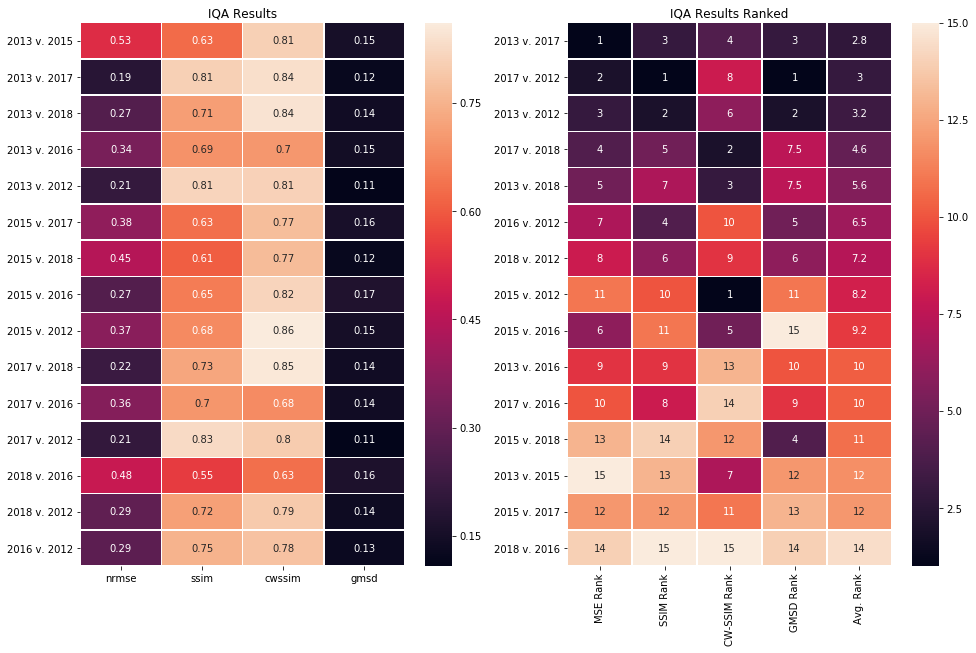

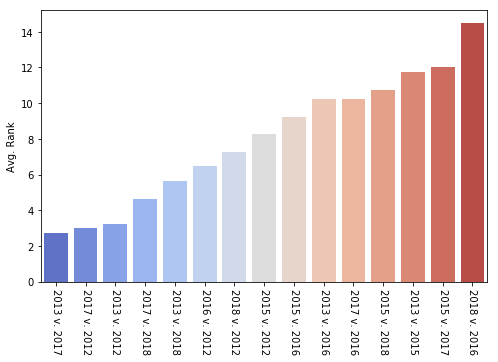

In [103]:
plot_iqa_scores_from_dfs(dfs)

[Text(0, 0, '2013 v. 2017'),
 Text(0, 0, '2017 v. 2012'),
 Text(0, 0, '2013 v. 2012'),
 Text(0, 0, '2017 v. 2018'),
 Text(0, 0, '2013 v. 2018'),
 Text(0, 0, '2016 v. 2012'),
 Text(0, 0, '2018 v. 2012'),
 Text(0, 0, '2015 v. 2012'),
 Text(0, 0, '2015 v. 2016'),
 Text(0, 0, '2013 v. 2016'),
 Text(0, 0, '2017 v. 2016'),
 Text(0, 0, '2015 v. 2018'),
 Text(0, 0, '2013 v. 2015'),
 Text(0, 0, '2015 v. 2017'),
 Text(0, 0, '2018 v. 2016')]

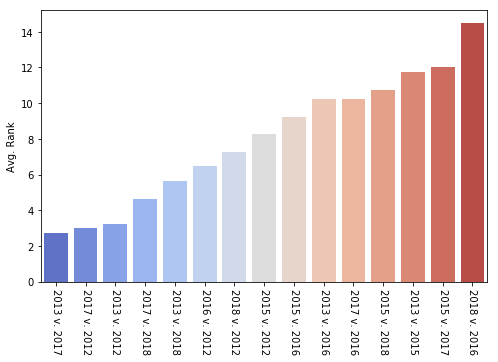

In [101]:
rdf = dfs[-1]
rdf.sort_values('Avg. Rank', inplace=True)
fig, ax = plt.subplots(figsize=(8, 5))
p = sns.color_palette('coolwarm', len(dfs[1]))
sns.barplot(rdf.index, y=rdf['Avg. Rank'],
            data=rdf, ax=ax, palette=p)

ax.set_xticklabels(ax.get_xticklabels(), rotation=270)

In [ ]:
# To plot the metrics, keep here
# for p in pairs.keys():
#     similarity_utils.plot_sim_metrics(pairs[p], p)
#similarity_utils.plot_comparison_inputs_stats(d)
#similarity_utils.plot_comparison_inputs(d)
#similarity_utils.plot_comparison_inputs_hists(d)

In [109]:
from glob import iglob
import os
import pandas as pd
import seaborn as sns

def read_df_rec(path, fn_regex=r'*ranks.csv'):
    dfs = []
    for f in iglob(os.path.join(path, '**', fn_regex), recursive=True):
        df = pd.read_csv(f)
        zone = os.path.abspath(f).split('/')[-4]
        df['Zone'] = zone
        if 'clpx' in f:
            domain = 'CLPX'
            df['Study Area'] = domain
        elif 'hv' in f:
            domain = 'Happy Valley'
            df['Study Area'] = domain
        #print(f)
        dfs.append(df)
    all_recs = pd.concat(dfs)
    all_recs['Winters'] = all_recs.iloc[:, 0]
    all_recs['Winters'] = all_recs['Winters'].apply(lambda x: x[-4:] + ' v. ' + x[0:4] if int(x[0:4]) > int(x[-4:]) else x)
    del all_recs['Unnamed: 0']
    return all_recs
    

In [110]:

ranks.head()

,MSE Rank,SSIM Rank,CW-SSIM Rank,GMSD Rank,Avg. Rank,Zone,Study Area,Winters
0,10.0,13.0,8.0,11.0,9.50,clpx_swale,CLPX,2015 v. 2018
1,7.0,6.0,15.0,5.0,10.00,clpx_swale,CLPX,2013 v. 2018
2,9.0,4.0,7.0,4.0,5.50,clpx_swale,CLPX,2012 v. 2018
3,3.5,8.0,1.0,6.0,3.50,clpx_swale,CLPX,2017 v. 2018
4,8.0,10.0,13.0,8.5,10.75,clpx_swale,CLPX,2016 v. 2018


In [139]:
results.head()

,nrmse,ssim,cwssim,gmsd,Zone,Study Area,Winters
0,0.309,0.636644,0.603,0.158,clpx_swale,CLPX,2015 v. 2018
1,0.284,0.786199,0.539,0.133,clpx_swale,CLPX,2013 v. 2018
2,0.294,0.786892,0.608,0.131,clpx_swale,CLPX,2012 v. 2018
3,0.240,0.760363,0.668,0.135,clpx_swale,CLPX,2017 v. 2018
4,0.291,0.718280,0.582,0.137,clpx_swale,CLPX,2016 v. 2018


Text(0.5, 1.0, 'GMSD')

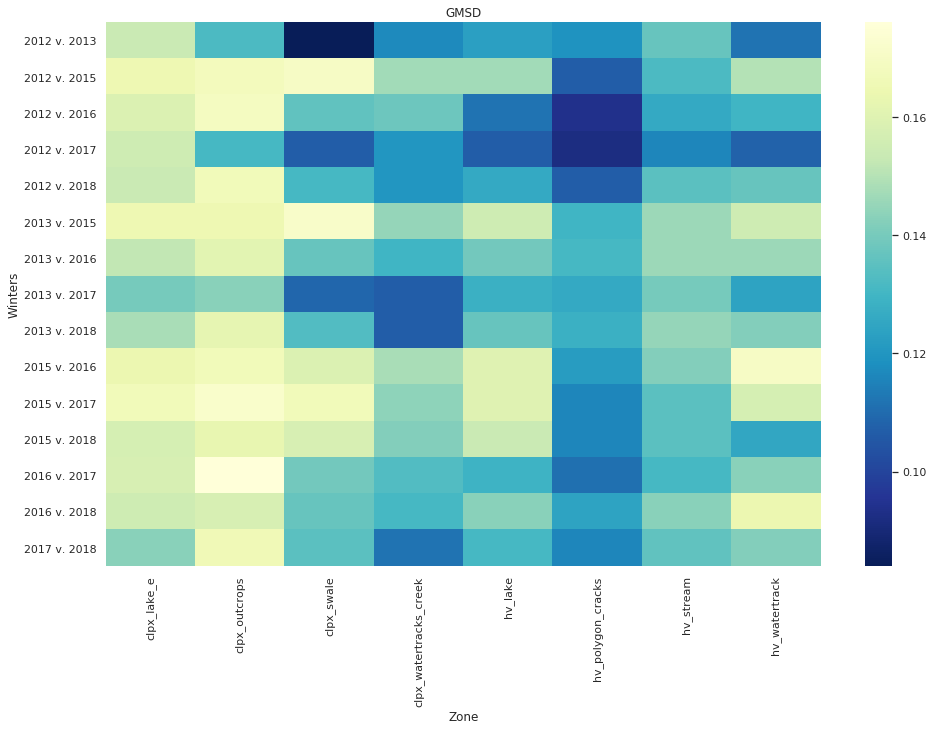

In [197]:
a = results.pivot('Winters', 'Zone', 'gmsd')
fig,ax = plt.subplots(figsize=(16,10))
sns.heatmap(a, cmap="YlGnBu_r", ax=ax)
ax.set_title('GMSD')

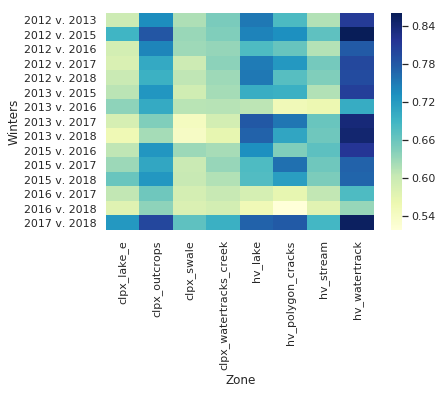

In [184]:
b = results.pivot('Winters', 'Zone', 'cwssim')
sns.heatmap(a, cmap="YlGnBu")

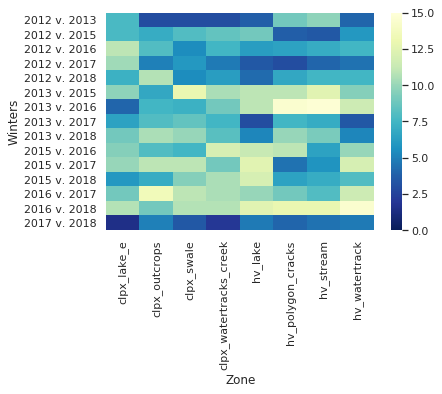

In [192]:
c = ranks.pivot('Winters', 'Zone', 'Avg. Rank')
sns.heatmap(c, cmap="YlGnBu_r", vmin=0, vmax=15)

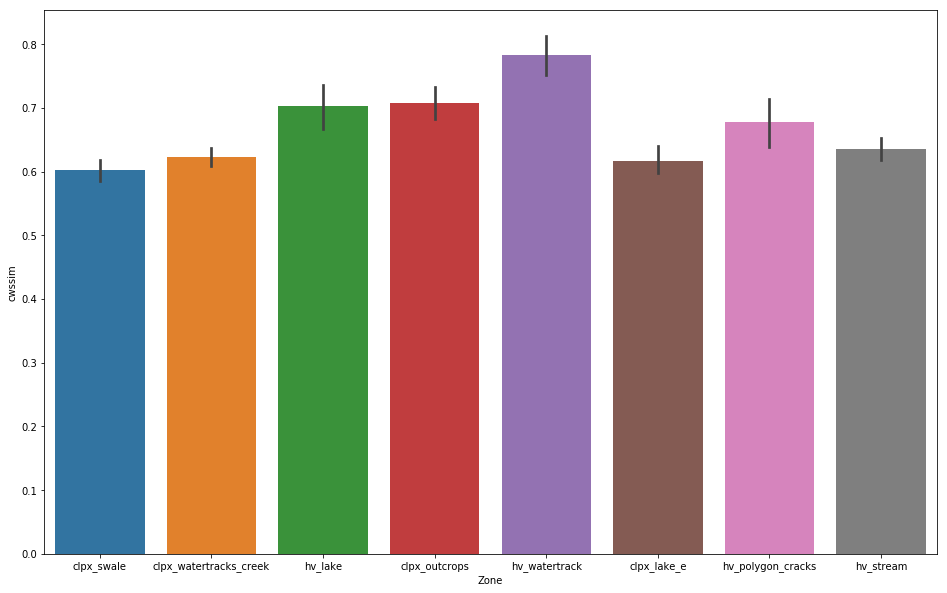

In [96]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,10))
sns.barplot(x="Zone", y="cwssim", data=a)